In [3]:
from gtfs_loader import load_routes_geodataframe

  route_id agency_id route_short_name                        route_long_name  \
0      C01       BUS              C01           Troncal C01 - 39A "Poniente"   
1      C02       BUS              C02                      Troncal C02 - 45A   
2      C03       BUS              C03  Troncal C03 - 61 "Mercado de Abastos"   
3      C04       BUS              C04                      Troncal C04 - 110   
4      C05       BUS              C05                      Troncal C05 - 136   

  route_type route_url route_color route_text_color  \
0          3       NaN      4C8D2B           FFFFFF   
1          3       NaN      4C8D2B           FFFFFF   
2          3       NaN      4C8D2B           FFFFFF   
3          3       NaN      4C8D2B           FFFFFF   
4          3       NaN      4C8D2B           FFFFFF   

                                            geometry  
0  LINESTRING (-103.45304 20.71202, -103.45321 20...  
1  LINESTRING (-103.21471 20.65078, -103.21486 20...  
2  LINESTRING (-103.329

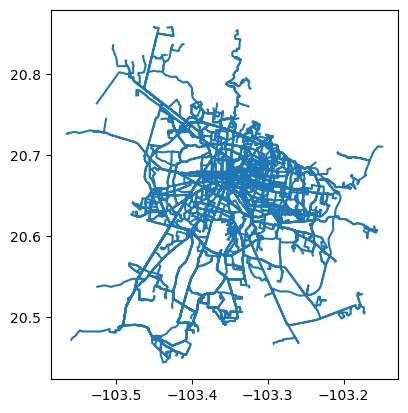

In [4]:
gdf = load_routes_geodataframe(r"../data/gtfs")
print(gdf.head())
gdf.plot()          # quick visual if running in a notebook with plotting support
gdf.to_file("routes.geojson", driver="GeoJSON")  # save to GeoJSON

In [128]:
def openMap(gdf):
    import folium
    # Determine a reasonable center for the map
    center = [0, 0]
    if len(gdf) > 0 and gdf.geometry.notna().any():
        # use centroid of first non-null geometry
        geom = gdf.geometry[gdf.geometry.notna()].iloc[0]
        c = geom.centroid
        center = [c.y, c.x]
    m = folium.Map(location=center, tiles="https://tile.openstreetmap.org/{z}/{x}/{y}.png", attr="OSM", zoom_start=12)

    def style_function(feature):
        # read route_color property and normalize to a hex color string
        color = feature.get('properties', {}).get('route_color')
        if color is None or (isinstance(color, float) and str(color) == 'nan') or str(color).strip() == '':
            color = '#000000'
        else:
            color = str(color).strip()
            if not color.startswith('#'):
                color = '#' + color
        return {'color': color, 'weight': 4, 'opacity': 0.9}

    folium.GeoJson(
        gdf.to_json(),
        style_function=style_function,
        tooltip=folium.GeoJsonTooltip(fields=['route_id','route_short_name','route_long_name'])
    ).add_to(m)

    html = 'map.html'
    m.save(html)

    import webbrowser
    webbrowser.open(html)

In [129]:
openMap(gdf)

In [130]:
minx, miny, maxx, maxy = gdf.total_bounds


In [131]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   route_id          276 non-null    object  
 1   agency_id         276 non-null    object  
 2   route_short_name  276 non-null    object  
 3   route_long_name   276 non-null    object  
 4   route_type        276 non-null    object  
 5   route_url         6 non-null      object  
 6   route_color       276 non-null    object  
 7   route_text_color  261 non-null    object  
 8   geometry          247 non-null    geometry
dtypes: geometry(1), object(8)
memory usage: 19.5+ KB


In [132]:
colors = ["#"+ val for val in gdf["route_color"]]

In [133]:
gdf

,route_id,agency_id,route_short_name,route_long_name,route_type,route_url,route_color,route_text_color,geometry
0,C01,BUS,C01,"Troncal C01 - 39A ""Poniente""",3,NaN,4C8D2B,FFFFFF,"LINESTRING (-103.45304 20.71202, -103.45321 20..."
1,C02,BUS,C02,Troncal C02 - 45A,3,NaN,4C8D2B,FFFFFF,"LINESTRING (-103.21471 20.65078, -103.21486 20..."
2,C03,BUS,C03,"Troncal C03 - 61 ""Mercado de Abastos""",3,NaN,4C8D2B,FFFFFF,"LINESTRING (-103.32986 20.54759, -103.32955 20..."
3,C04,BUS,C04,Troncal C04 - 110,3,NaN,4C8D2B,FFFFFF,"LINESTRING (-103.32183 20.73404, -103.32227 20..."
4,C05,BUS,C05,Troncal C05 - 136,3,NaN,4C8D2B,FFFFFF,"LINESTRING (-103.24013 20.58422, -103.24008 20..."
...,...,...,...,...,...,...,...,...,...
271,LM-V01,BUS,LM-V01,"Troncal LM-V01 ""Central Vieja""",3,NaN,4C8D2B,FFFFFF,"LINESTRING (-103.3458 20.66276, -103.34575 20...."
272,LM-V02,BUS,LM-V02,"Troncal LM-V02 ""San Juan de Dios""",3,NaN,4C8D2B,FFFFFF,"LINESTRING (-103.34058 20.67755, -103.34103 20..."
273,LM-C01,BUS,LM-C01,"Troncal LM-C01 ""Tren Sur""",3,NaN,4C8D2B,FFFFFF,"LINESTRING (-103.40177 20.60646, -103.40116 20..."
274,LM-C02,BUS,LM-C02,"Troncal LM-C02 ""Centro Sur""",3,NaN,4C8D2B,FFFFFF,"LINESTRING (-103.40237 20.60393, -103.40222 20..."


In [134]:
gdf[gdf["geometry"] == None]

,route_id,agency_id,route_short_name,route_long_name,route_type,route_url,route_color,route_text_color,geometry
36,C119,BUS,C119,"Troncal C119 - 360 ""Esteban Alatorre - Jesus G...",3,NaN,4C8D2B,FFFFFF,None
123,C63,BUS,C63,"Troncal C63 - 644B ""SB""",3,NaN,4C8D2B,FFFFFF,None
170,T06-03,BUS,T06-03,"Troncal T06-03 - 37A ""Zalate""",3,NaN,D40000,FFFFFF,None
172,T07-C01,BUS,T07-C01,"Troncal T07-C01 - 30A ""Enrique Diaz de Leon Co...",3,NaN,4C8D2B,FFFFFF,None
175,T07-C04,BUS,T07-C04,"Troncal T07-C04 - 128 ""Enrique Diaz de Leon Co...",3,NaN,4C8D2B,FFFFFF,None
190,T13A-C01,BUS,T13A-C01,"Troncal T13A-C01 - 180 ""Rancho Alegre""",3,NaN,4C8D2B,FFFFFF,None
191,T13A-C02,BUS,T13A-C02,"Troncal T13A-C02 - 180 ""Solidaridad Complement...",3,NaN,4C8D2B,FFFFFF,None
192,T13A-C03,BUS,T13A-C03,"Troncal T13A-C03 - 178 ""Parques del Castillo""",3,NaN,4C8D2B,FFFFFF,None
193,T13B-C01-1,BUS,T13B-C01-1,"Troncal T13B-C01-1 - 176 ""Solidaridad""",3,NaN,4C8D2B,FFFFFF,None
194,T13B-C02-1,BUS,T13B-C02-1,"Troncal T13B-C02 - 176C ""Solidaridad Complemen...",3,NaN,4C8D2B,FFFFFF,None


In [138]:
gdf[gdf["route_long_name"].str.contains("T14B")]

,route_id,agency_id,route_short_name,route_long_name,route_type,route_url,route_color,route_text_color,geometry
202,T14B,BUS,T14B,"Troncal T14B - 50 ""Reyes Heroles""",3,NaN,D40000,FFFFFF,"LINESTRING (-103.33751 20.74585, -103.33768 20..."
203,T14B-C03-1,BUS,T14B-C03-1,"Troncal T14B-C03-01 - 52C ""8 de Julio""",3,NaN,4C8D2B,FFFFFF,"LINESTRING (-103.3904 20.59927, -103.38965 20...."
204,T14B-C03-2,BUS,T14B-C03-2,"Troncal T14B-C03-02 - 52C ""8 de Julio""",3,NaN,4C8D2B,FFFFFF,"LINESTRING (-103.3904 20.59927, -103.38965 20...."


In [139]:
import math


math.isnan(gdf["route_url"][0])

True

In [140]:
gdf[gdf["route_url"].notna()]

,route_id,agency_id,route_short_name,route_long_name,route_type,route_url,route_color,route_text_color,geometry
262,MT_L1,MT,L1,Linea 1 Periferico Sur-Auditorio,0,http://www.siteur.gob.mx/estaciones-tren-liger...,D40D0D,FFFFFF,"LINESTRING (-103.40135 20.60686, -103.39965 20..."
263,MT_L2,MT,L2,Linea 2 Juarez-Tetlan,0,http://www.siteur.gob.mx/estaciones-tren-liger...,116633,FFFFFF,"LINESTRING (-103.2758 20.65978, -103.27765 20...."
264,ST_L1,ST,L1,Linea 1 Juárez-Aviación,3,http://www.siteur.gob.mx/sitren/linea-1.html,B61F3E,FFFFFF,"LINESTRING (-103.51269 20.74581, -103.51337 20..."
265,ST_L2,ST,L2,Linea 2 Tetlán-Tonalá,3,http://www.siteur.gob.mx/sitren/linea-2.html,B61F3E,FFFFFF,"LINESTRING (-103.27412 20.65958, -103.27423 20..."
266,ST_L3,ST,L3,Linea 3 Arcos-Felipe Ángeles,3,http://www.siteur.gob.mx/sitren/linea-3.html,B61F3E,FFFFFF,"LINESTRING (-103.30399 20.67151, -103.30364 20..."
267,ST_L4,ST,L4,Linea 4 Juan Gil Preciado-Molinos,3,http://www.siteur.gob.mx/sitren/linea4.html,B61F3E,FFFFFF,"LINESTRING (-103.42602 20.8578, -103.42594 20...."


In [141]:
gdf.total_bounds


array([-103.564869,   20.444435, -103.149039,   20.858334])